In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

2025-11-10 15:23:08.701634: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-10 15:23:09.257850: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-10 15:23:12.352978: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

#Convert lables to one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)

In [5]:
#Build model
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

#compile model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Train model
history = model.fit(x_train,y_train,
                    epochs = 5, 
                    validation_split = 0.1)

#Evaluate model
loss,acc = model.evaluate(x_test,y_test)
print("Test loss", loss)
print("Test accuracy",acc)

/home/mohit/miniconda3/envs/dl/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1762788647.188038    3338 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1765 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/5


2025-11-10 15:30:50.610229: I external/local_xla/xla/service/service.cc:163] XLA service 0x7bbb34019930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-10 15:30:50.610268: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-11-10 15:30:50.662054: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-10 15:30:50.858009: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91301
2025-11-10 15:30:50.906700: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 15:30:51.458471: I e

  30/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3656 - loss: 1.9707 

I0000 00:00:1762788653.806296    4710 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9198 - loss: 0.2774 - val_accuracy: 0.9667 - val_loss: 0.1285
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9643 - loss: 0.1209 - val_accuracy: 0.9707 - val_loss: 0.1005
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9752 - loss: 0.0825 - val_accuracy: 0.9737 - val_loss: 0.0856
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9810 - loss: 0.0620 - val_accuracy: 0.9742 - val_loss: 0.0829
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9851 - loss: 0.0484 - val_accuracy: 0.9772 - val_loss: 0.0793
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0780
Test loss 0.07802599668502808
Test accuracy 0.9750000238418579


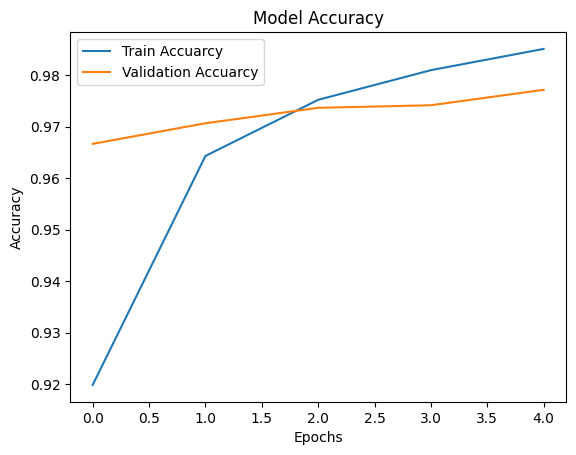

In [8]:
#Plot 
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'Train Accuarcy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuarcy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


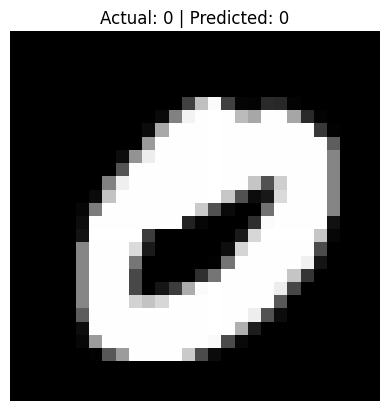

In [10]:
import numpy as np
idx = np.random.randint(0,x_test.shape[0])
img = x_test[idx]

label = np.argmax(y_test[idx])

pred = np.argmax(model.predict(img.reshape(1,28,28)))

plt.imshow(img,cmap = 'gray')
plt.title(f"Actual: {label} | Predicted: {pred}")
plt.axis('off')
plt.show()